In [123]:
# Question :-
# In this assignment candidate will train the model to detect the following:- 
# 'airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'.
# CIFAR-10 Dataset to be used for this Industry assignment.
# Remember :- we would need to do object detection and not classifciation.``
# Reference :- p1_2.ipynb in the main branch of DL folder.

### CIFAR dataset

The CIFAR-10 "Canadian Institute for Advanced Research 10" dataset is a popular benchmark dataset for training and evaluating machine learning models, especially Convolutional Neural Networks (CNNs), in the field of computer vision. It consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 test images.

In [48]:
# Importing all the necessary libraries

from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# from tensorflow.image import rgb_to_grayscale
# from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import to_categorical


import tensorflow
import matplotlib
import sklearn
import seaborn
import cv2
print(f"Tensorflow version:- {tensorflow.__version__}")
print(f"Matplotlib version:- {matplotlib.__version__}")
print(f"Numpy version:- {np.__version__}")
print(f"Scikit-learn :- {sklearn.__version__}")
print(f"Sebaorn :- {seaborn.__version__}")
print(f"opencv-python :- {cv2.__version__}")

Tensorflow version:- 2.13.0
Matplotlib version:- 3.7.2
Numpy version:- 1.24.3
Scikit-learn :- 1.3.0
Sebaorn :- 0.12.2
opencv-python :- 4.8.0


In [2]:
# Loading the data in train image, train labels and test image and test labels using load_data() method.

(X_train_images, y_train_labels), (X_test_images, y_test_labels) = cifar10.load_data()

The X_train_images array is a 4-dimensional NumPy array that holds the training images. Its shape is (num_samples, height, width, num_channels) where:

num_samples is the number of images in the training set.
height is the height of each image in pixels.
width is the width of each image in pixels.
num_channels is the number of color channels in each image (usually 3 for RGB images).
For the CIFAR-10 dataset specifically, X_train_images.shape would be something like (50000, 32, 32, 3), indicating that there are 50,000 training images, each with dimensions 32x32 pixels and 3 color channels (RGB).

In [126]:
# Dataset label numbers and there names

# 1 --> Airplane
# 2 --> Automobile
# 3 --> Bird
# 4 --> Cat
# 5 --> Deer
# 6 --> Dog
# 7 --> Frog
# 8 --> Horse
# 9 --> Ship
# 10 --> Truck

In [3]:
# Define class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Print labels and their corresponding class names
for label in y_train_labels[0:10:1]:  # Print the first 10 labels
    class_name = class_names[label[0]]
    print(f"Label: {label[0]} - Class Name: {class_name}")

Label: 6 - Class Name: Frog
Label: 9 - Class Name: Truck
Label: 9 - Class Name: Truck
Label: 4 - Class Name: Deer
Label: 1 - Class Name: Automobile
Label: 1 - Class Name: Automobile
Label: 2 - Class Name: Bird
Label: 7 - Class Name: Horse
Label: 8 - Class Name: Ship
Label: 3 - Class Name: Cat


In [4]:
# Display the information about the X_train_images

print(f"{' Information regarding the X_train_images ':#^70}", end = "\n\n")
print(f"X_train_images shape:- {X_train_images.shape}")
print(f"Number of sample images of X_train_images:- {X_train_images.shape[0]}")
print(f"X_train_images Image height :- {X_train_images.shape[1]}")
print(f"X_train_images Image width:- {X_train_images.shape[2]}")
print(f"X_train_images Colour channels:- {X_train_images.shape[3]}")
print(f"Shape of the first image in X_train_images:- {X_train_images[0].shape}")
print(f"Height of the first image in X_train_images:- {X_train_images[0].shape[0]}")
print(f"Width of the first image in X_train_images:- {X_train_images[0].shape[1]}")
print(f"Number of channels in the first image:- {X_train_images[0].shape[2]}")
# Finding out what is the mininum and maximum value in X_train_images and X_test_images
# Before pre-processing the image data. Color channels ranges from 0 to 255
print(f"Maximum value in X_train_images:- { float(np.max(X_train_images[0])) }")
print(f"Minimum value of the X_train_images:- { float(np.min(X_train_images[0])) }")

############## Information regarding the X_train_images ##############

X_train_images shape:- (50000, 32, 32, 3)
Number of sample images of X_train_images:- 50000
X_train_images Image height :- 32
X_train_images Image width:- 32
X_train_images Colour channels:- 3
Shape of the first image in X_train_images:- (32, 32, 3)
Height of the first image in X_train_images:- 32
Width of the first image in X_train_images:- 32
Number of channels in the first image:- 3
Maximum value in X_train_images:- 255.0
Minimum value of the X_train_images:- 0.0


In [5]:
# Display the information of y_train_labels

print(f"{' Information of y_train_labels ':#^70}", end = "\n\n")
print(f"y_train_labels shape:- {y_train_labels.shape}")
print(f"Number of labels in the y_train_labels :- {y_train_labels.shape[0]}")
print(f"Labels of y_train_labels :- {y_train_labels.shape[1]}")
print("Number of classes:- ", len(set(y_train_labels.flatten()))) # (50000,)

################### Information of y_train_labels ####################

y_train_labels shape:- (50000, 1)
Number of labels in the y_train_labels :- 50000
Labels of y_train_labels :- 1
Number of classes:-  10


In [6]:
# Display the information about the X_test_images

print(f"{' Information regarding the X_test_images ':#^70}", end = "\n\n")
print(f"X_test_images shape:- {X_test_images.shape}")
print(f"Number of sample images of X_test_images:- {X_test_images.shape[0]}")
print(f"X_test_images Image height :- {X_test_images.shape[1]}")
print(f"X_test_images Image width:- {X_test_images.shape[2]}")
print(f"X_test_images Colour channels:- {X_test_images.shape[3]}")
print(f"Shape of the first image in X_test_images:- {X_test_images[0].shape}")
print(f"Height of the first image in X_test_images:- {X_test_images[0].shape[0]}")
print(f"Width of the first image in X_test_images:- {X_test_images[0].shape[1]}")
print(f"Number of channels in the first image:- {X_test_images[0].shape[2]}")
# Finding out what is the mininum and maximum value in X_train_images
# Before pre-processing the image data. Color channels ranges from 0 to 255
print(f"Maximum value in X_test_images:- { float(np.max(X_test_images[0])) }")
print(f"Minimum value of the X_test_images:- { float(np.min(X_test_images[0])) }")

############## Information regarding the X_test_images ###############

X_test_images shape:- (10000, 32, 32, 3)
Number of sample images of X_test_images:- 10000
X_test_images Image height :- 32
X_test_images Image width:- 32
X_test_images Colour channels:- 3
Shape of the first image in X_test_images:- (32, 32, 3)
Height of the first image in X_test_images:- 32
Width of the first image in X_test_images:- 32
Number of channels in the first image:- 3
Maximum value in X_test_images:- 255.0
Minimum value of the X_test_images:- 13.0


In [7]:
# Display the information of y_test_labels

print(f"{' Information of y_test_labels ':#^70}", end = "\n\n")
print(f"y_test_labels shape:- {y_test_labels.shape}")
print(f"Number of labels in the y_test_labels :- {y_test_labels.shape[0]}")
print(f"Labels of y_test_labels :- {y_test_labels.shape[1]}")
print("Number of classes:- ", len(set(y_test_labels.flatten()))) # (10000,)

#################### Information of y_test_labels ####################

y_test_labels shape:- (10000, 1)
Number of labels in the y_test_labels :- 10000
Labels of y_test_labels :- 1
Number of classes:-  10


In [8]:
# Preprocessing the train images and test images. 
# Normalizing the values from 0 to 255 to 0.0 to 1.0 
# using float of maximum in first image of X_train_images and X_test_images

X_train_images = X_train_images / float(np.max(X_train_images[0]))
X_test_images = X_test_images / float(np.max(X_test_images[0]))

In [9]:
# After processing of the image data

print("Maximum value of the train images:- ", np.max(X_train_images))
print("Minimum value of the train images:- ", np.min(X_train_images))

Maximum value of the train images:-  1.0
Minimum value of the train images:-  0.0


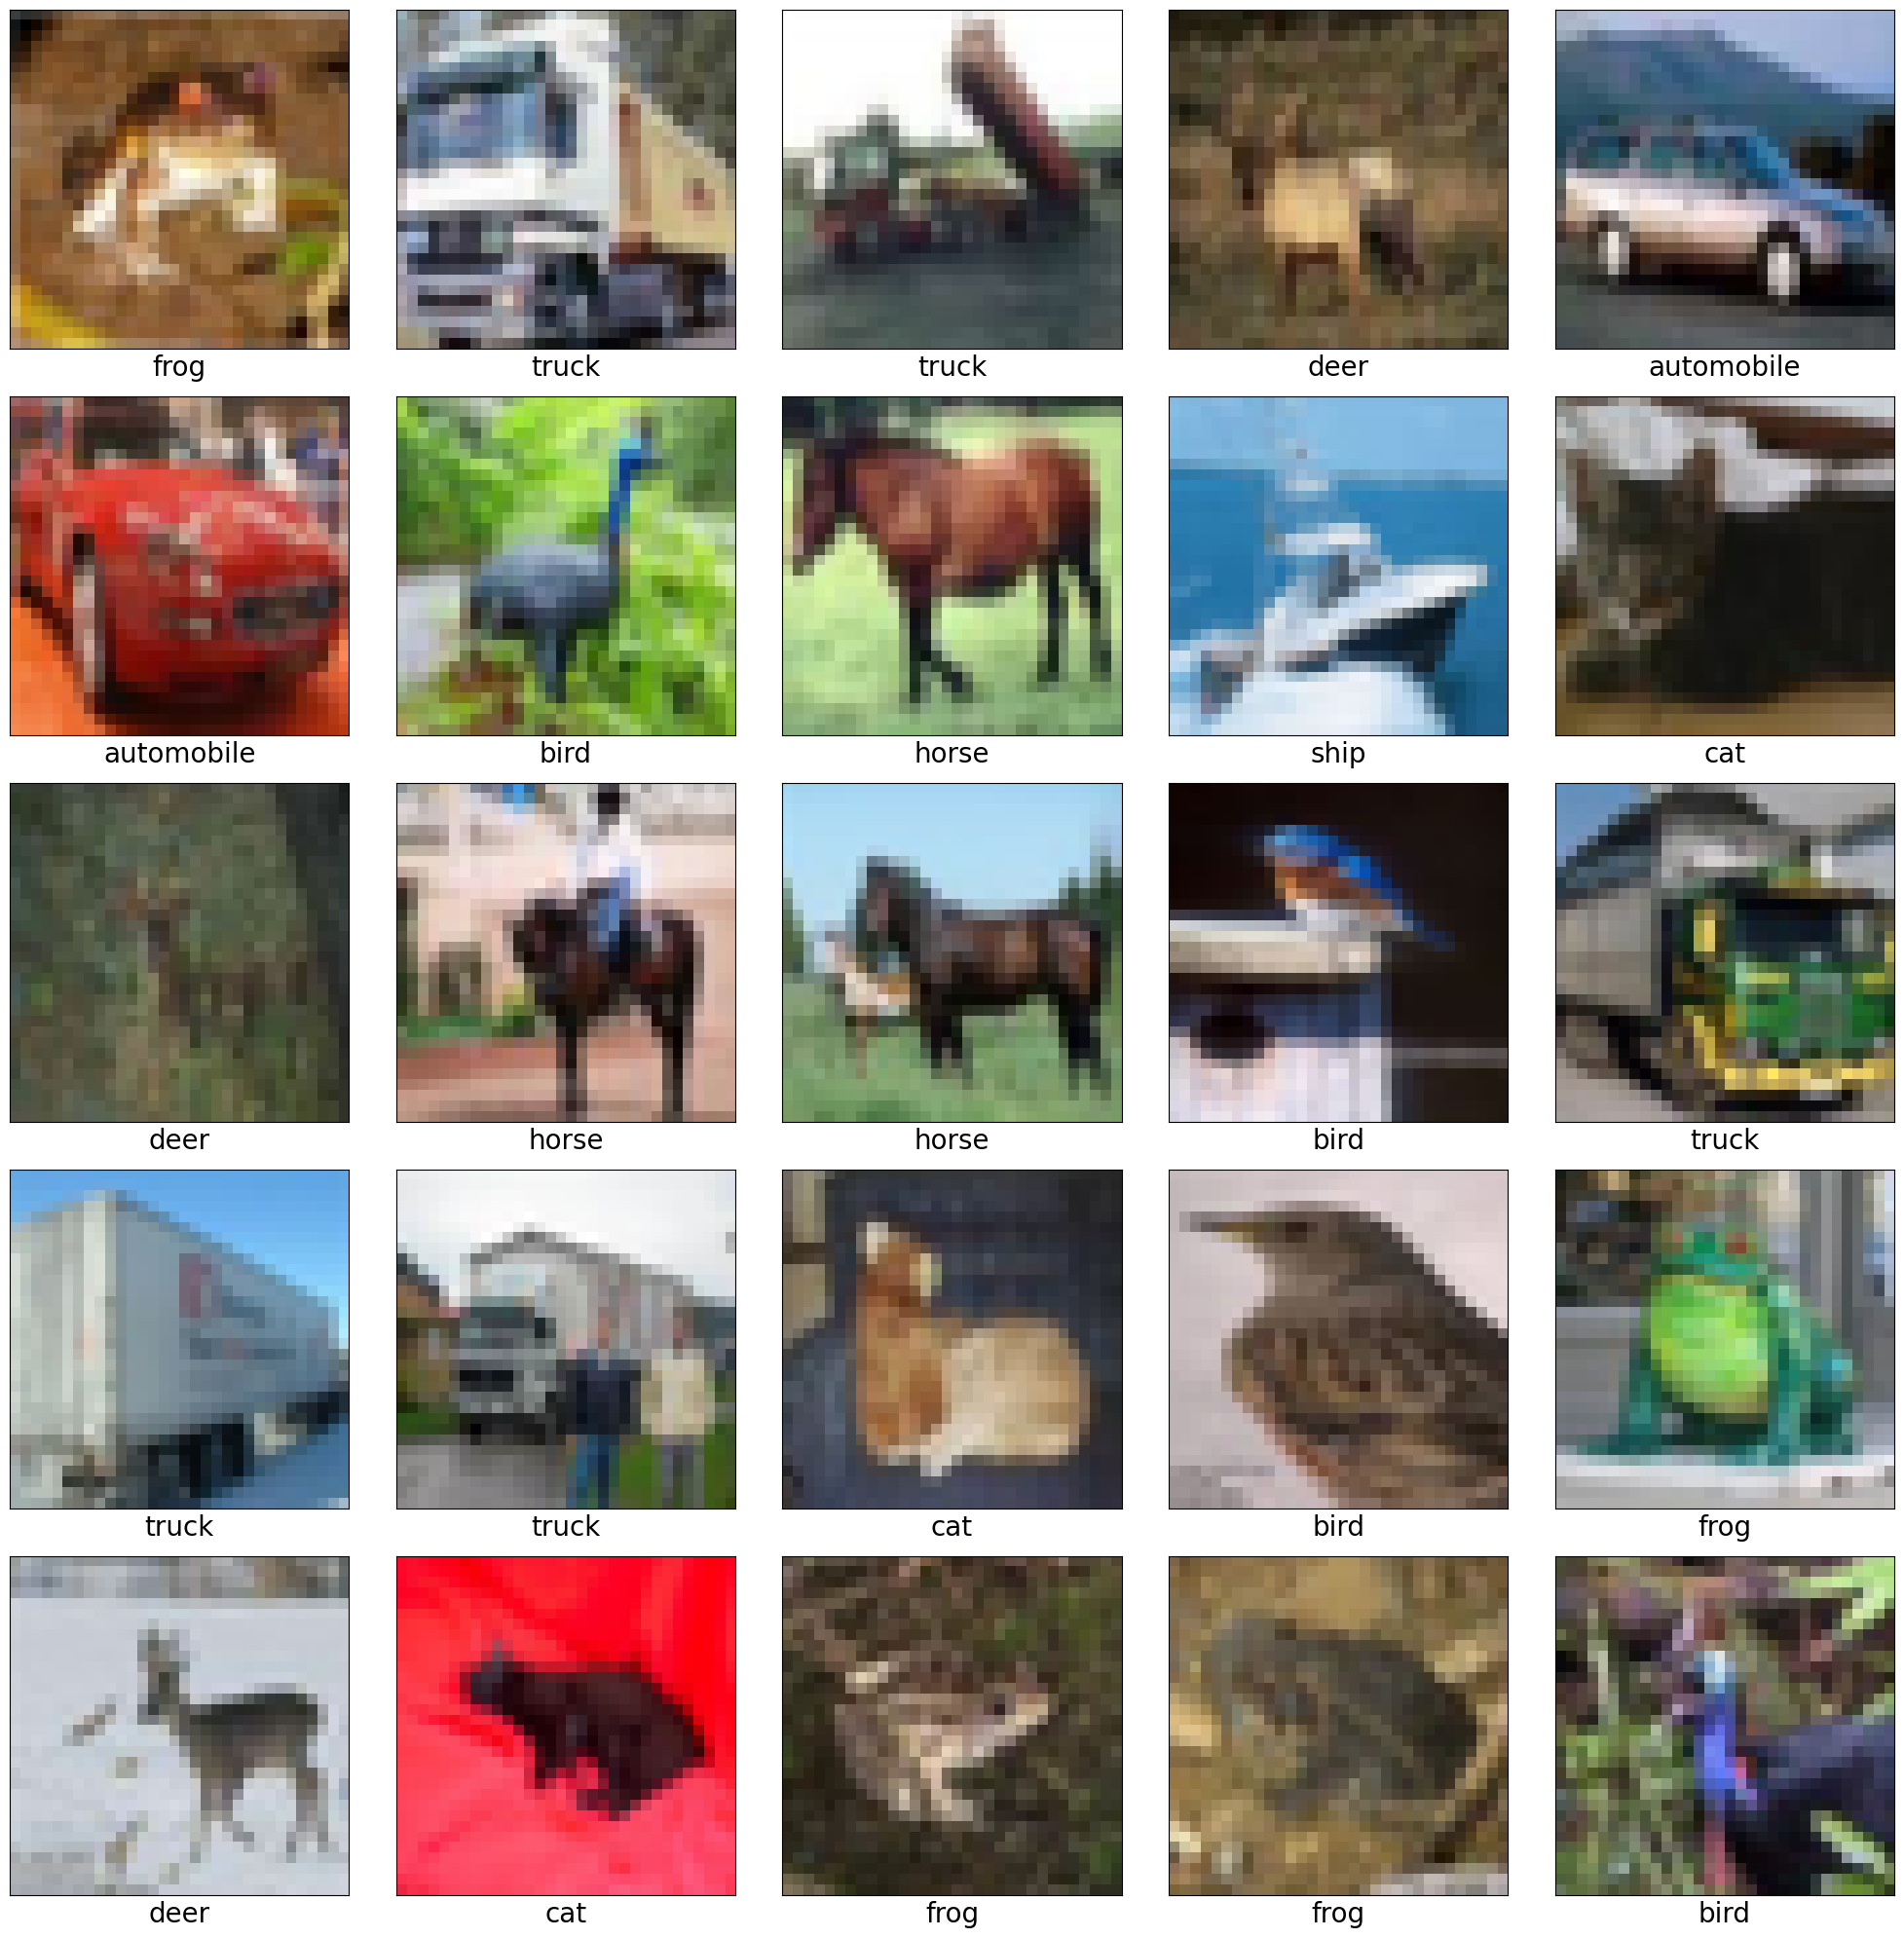

In [10]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(True)
    plt.imshow(X_train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why we would need the extra index
    plt.xlabel(class_names[y_train_labels[i][0]], fontsize = 20)

plt.tight_layout()
plt.show()

In [14]:
# Now!, We can proceed with the creation of the CNN model

model = Sequential(
    [
        Conv2D(input_shape = (32, 32, 3), filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        Flatten(),
        Dense(units = 64, activation = "relu"),
        Dense(10, activation = "softmax")
    ]
)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [17]:
y_train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
y_test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [19]:
y_train_labels = to_categorical(y_train_labels, num_classes = 10)
y_test_labels = to_categorical(y_test_labels, num_classes = 10)

In [20]:
# compile a and train the model.

model.compile(optimizer = "adam", loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# Train the model with batch size and epochs
batch_size = 64
epochs = 2 # 10
history = model.fit(X_train_images, y_train_labels, batch_size = batch_size, epochs = epochs, validation_data = (X_test_images, y_test_labels))

Epoch 1/2
782/782 [==============================] - 52s 64ms/step - loss: 1.6297 - accuracy: 0.4009 - val_loss: 1.3915 - val_accuracy: 0.5012
Epoch 2/2
782/782 [==============================] - 48s 61ms/step - loss: 1.2743 - accuracy: 0.5447 - val_loss: 1.2108 - val_accuracy: 0.5693


In [21]:
# Saving the entire model (Architecture and Weights) in current working directory.

model.save("IA_1_model.h5")

c:\IA_SEM_3\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
model = load_model("IA_1_model.h5")

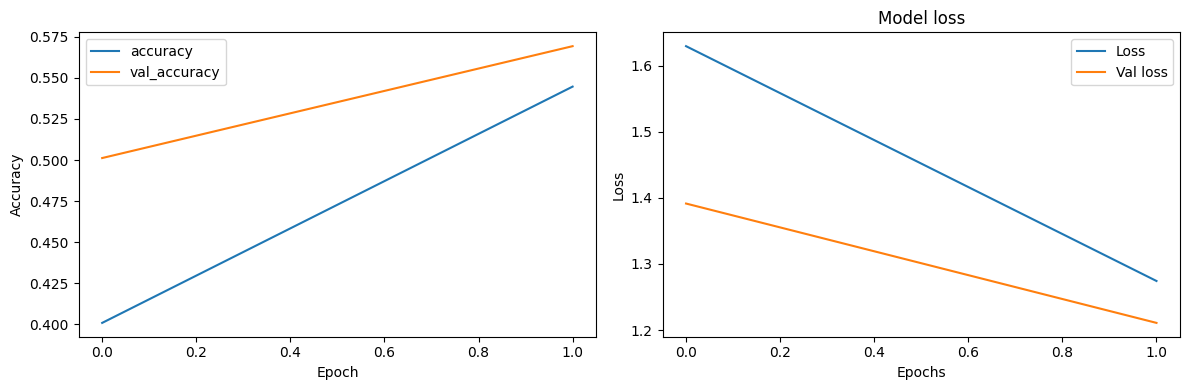

In [23]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot of model accuracy
ax1.plot(history.history["accuracy"], label="accuracy")
ax1.plot(history.history["val_accuracy"], label="val_accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="upper left")

# Plot for model loss
ax2.plot(history.history["loss"], label="Loss")
ax2.plot(history.history["val_loss"], label="Val loss")
ax2.set_title("Model loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Loss", "Val loss"], loc='upper right')

# Adjust layout for better spacing between subplots
plt.tight_layout()

plt.show()


In [25]:
test_loss, test_acc = model.evaluate(X_test_images, y_test_labels, verbose = 2)
print(f"Model loss :- {test_loss}")
print(f"Model Accuracy :- {test_acc}")

313/313 - 3s - loss: 1.2108 - accuracy: 0.5693 - 3s/epoch - 9ms/step
Model loss :- 1.2108373641967773
Model Accuracy :- 0.5692999958992004


In [26]:
# Model prediction and classification report
X_test_predictions = model.predict(X_test_images)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

# Generating the classification report
print("Classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels, zero_division=0))

313/313 [==============================] - 3s 9ms/step
Classification report
              precision    recall  f1-score   support

           0       0.65      0.60      0.63      1000
           1       0.69      0.74      0.72      1000
           2       0.40      0.50      0.44      1000
           3       0.46      0.26      0.33      1000
           4       0.44      0.56      0.49      1000
           5       0.48      0.58      0.53      1000
           6       0.52      0.76      0.62      1000
           7       0.74      0.55      0.63      1000
           8       0.72      0.68      0.70      1000
           9       0.78      0.47      0.59      1000

    accuracy                           0.57     10000
   macro avg       0.59      0.57      0.57     10000
weighted avg       0.59      0.57      0.57     10000



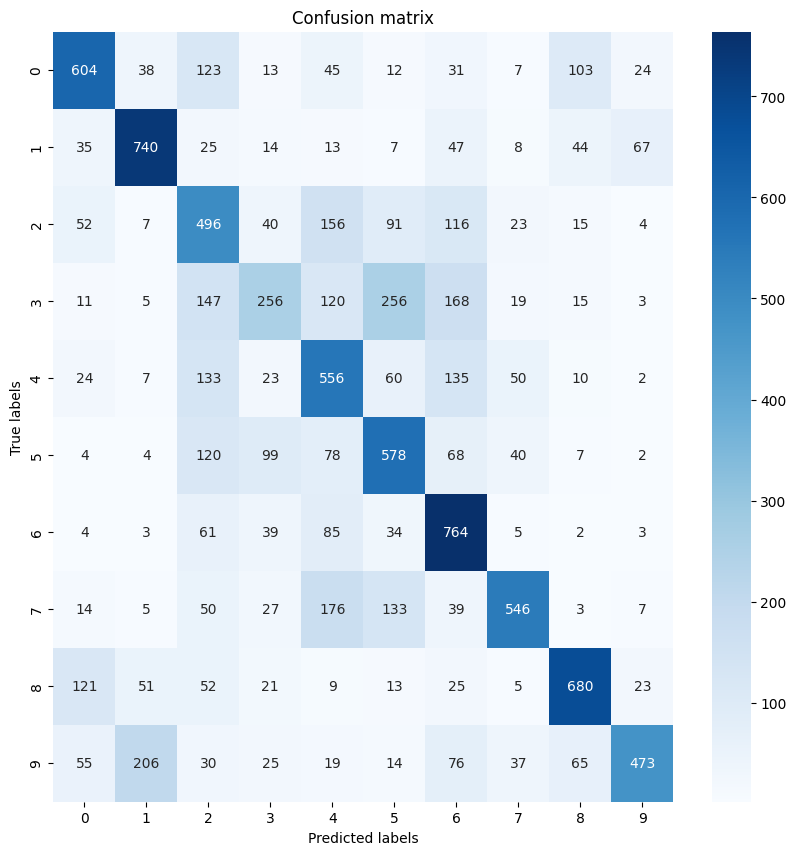

In [27]:
# Generate the Confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix in the form of heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
xtickslabels = range(0, 10, 1)
ytickslabels = range(0, 10, 1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()


313/313 [==============================] - 3s 10ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_3500\2603876897.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


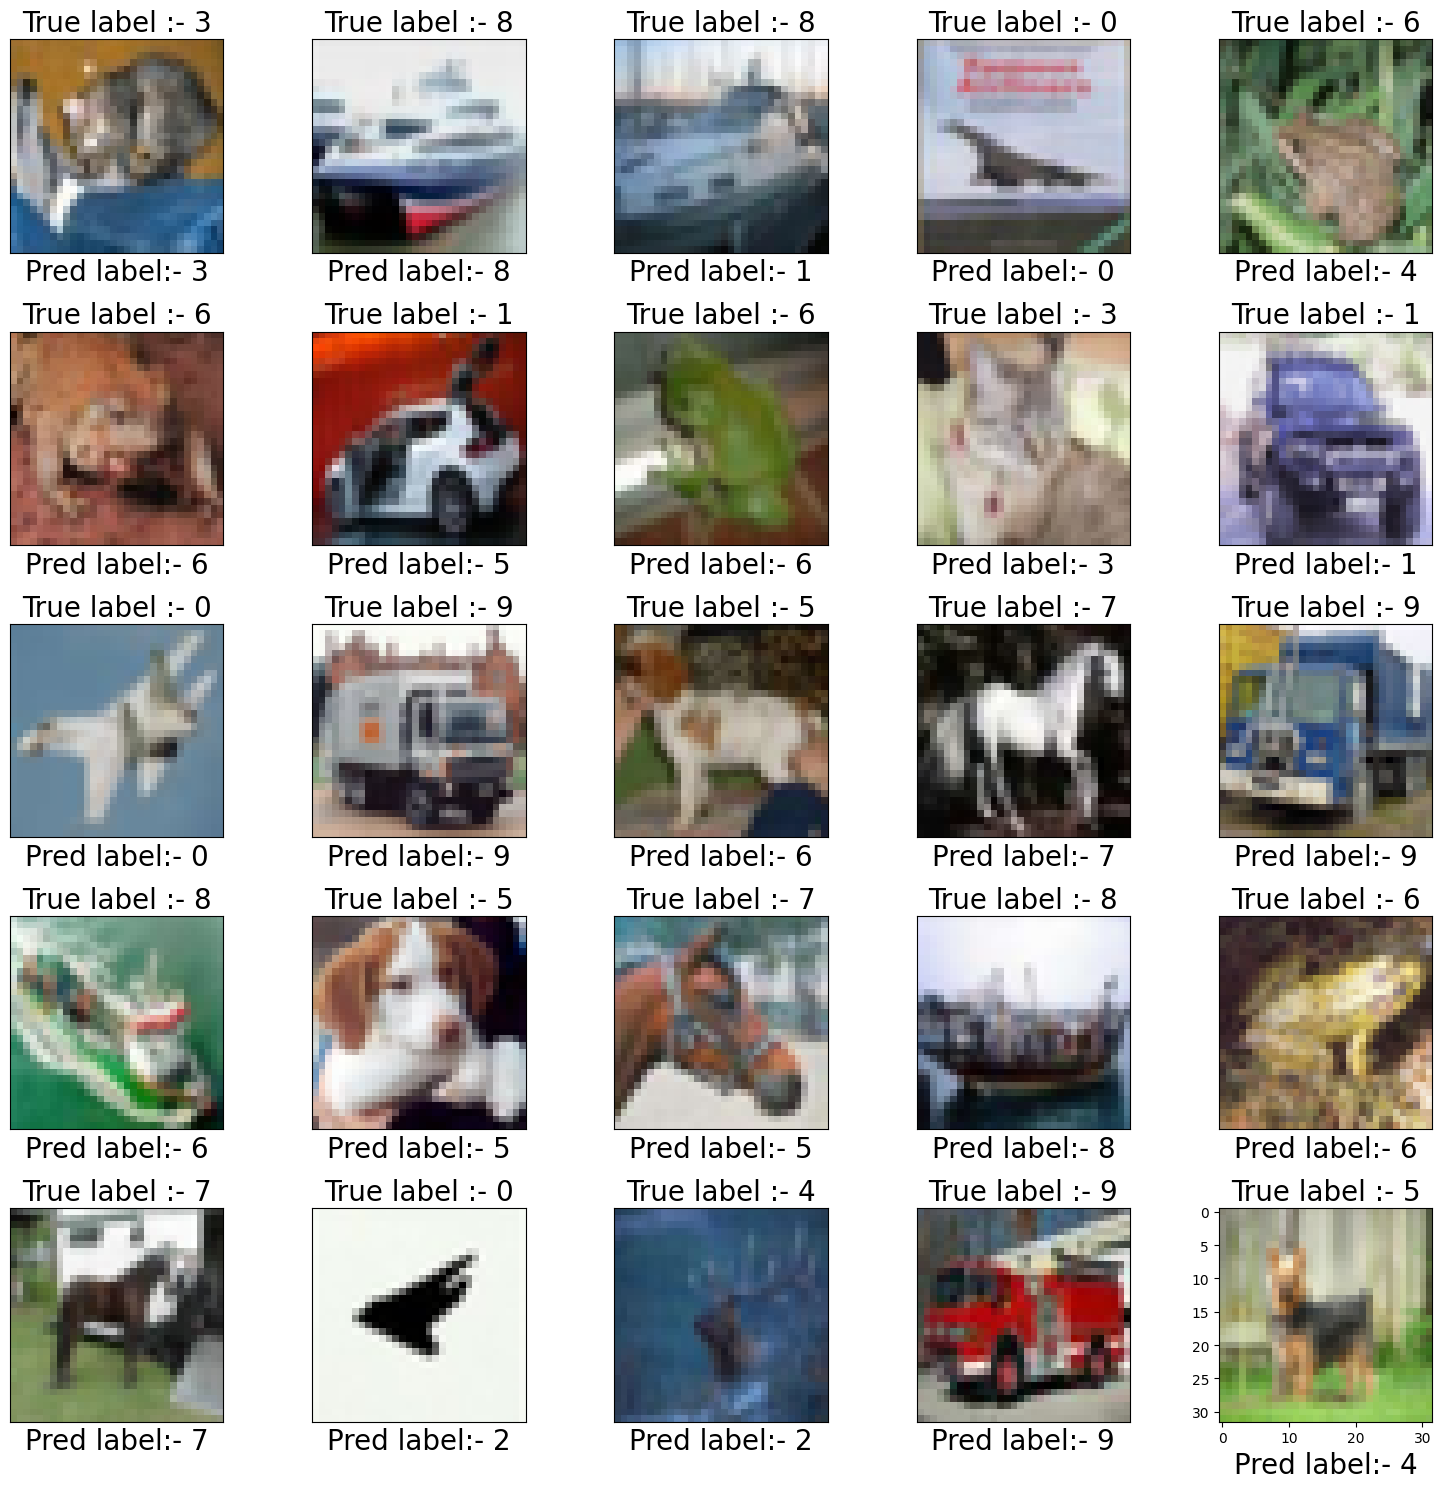

In [28]:
# Visualization of predicted data

# Model prediction
X_test_predictions = model.predict(X_test_images)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

plt.figure(figsize = (15, 15))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_images[i], cmap = "gray")
    plt.title(f"True label :- {y_test_true_labels[i]}", fontsize = 20)
    plt.xlabel(f"Pred label:- {y_test_pred_labels[i]}", fontsize = 20)

plt.tight_layout()
plt.show()

In [146]:
# # plot the model # https://graphviz.gitlab.io/download/
# # Download and run the graphviz-8.1.0 (64-bit) EXE installer [sha256] and 
# # click to checbox of add environment variable to all user and icon in desktop
# # pip install pydot and ( --> Seperate installation )pip install graphviz
# # Check in terminal `` dot -v `` for successful installation.
# plot_model(model, to_file = "p3_model_diagram.png", show_shapes = True, show_layer_names = True)

In [147]:
# Method 2:-
# Visualizing the NN model through netron
# pip install netron
# After successful installation type ```netron``` in terminal. It will open in localhost

In [148]:
# # Method 3 # Tensorboard method

# from tensorflow.keras.callbacks import TensorBoard

# # All callbacks will be saved in logs folder.
# model_callbacks = TensorBoard(log_dir = "p3_logs")

# model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "mse"])

# model.fit(x = X_train_images, y = y_train_labels, 
#                 epochs = 5, validation_split = 0.1, 
#                 validation_data = (X_test_images, y_test_labels), 
#                 shuffle = True, callbacks = model_callbacks)

# # in terminal type :- tensorboard --logdir=p3_logs

In [149]:
3232 vdsadd

SyntaxError: invalid syntax (1352206045.py, line 1)

In [ ]:
# import tensorflow as tf

# # Load the CIFAR-10 dataset
# (X_train_images, y_train_labels), (X_test_images, y_test_labels) = cifar10.load_data()

# # Convert to grayscale using tf.image.rgb_to_grayscale()
# X_train_images_gray = tf.image.rgb_to_grayscale(X_train_images)
# X_test_images_gray = tf.image.rgb_to_grayscale(X_test_images)

# # Convert to float32
# X_train_images_gray = tf.cast(X_train_images_gray, tf.float32)
# X_test_images_gray = tf.cast(X_test_images_gray, tf.float32)

# # Normalize grayscale pixel values between 0 and 1
# X_train_images_gray = X_train_images_gray / 255.0
# X_test_images_gray = X_test_images_gray / 255.0

# # Check max and min pixel values after normalization
# print("Maximum value of the train images:", np.max(X_train_images_gray))
# print("Minimum value of the train images:", np.min(X_train_images_gray))


Maximum value of the train images: 1.0
Minimum value of the train images: 0.0


In [29]:

# Loading the CIFAR-10 dataset for testing on grey scale
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = cifar10.load_data()

# Convert to grayscale using cv2.cvtColor
X_train_images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_train_images])
X_test_images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_test_images])

# Normalize grayscale pixel values between 0 and 1
X_train_images_gray = X_train_images_gray / 255.0
X_test_images_gray = X_test_images_gray / 255.0

# Check max and min pixel values after normalization
print("Maximum value of the train images:", np.max(X_train_images_gray))
print("Minimum value of the train images:", np.min(X_test_images_gray))


Maximum value of the train images: 1.0
Minimum value of the train images: 0.0


In [30]:
X_train_images_gray = np.expand_dims(X_train_images_gray, axis = -1)
X_test_images_gray = np.expand_dims(X_test_images_gray, axis = -1)

In [31]:
print(X_train_images_gray.shape)
print(X_test_images_gray.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [35]:
# One-Hot Encoding test labels and train labels

y_train_labels = to_categorical(y_train_labels, num_classes = 10)
y_test_labels = to_categorical(y_test_labels, num_classes = 10)

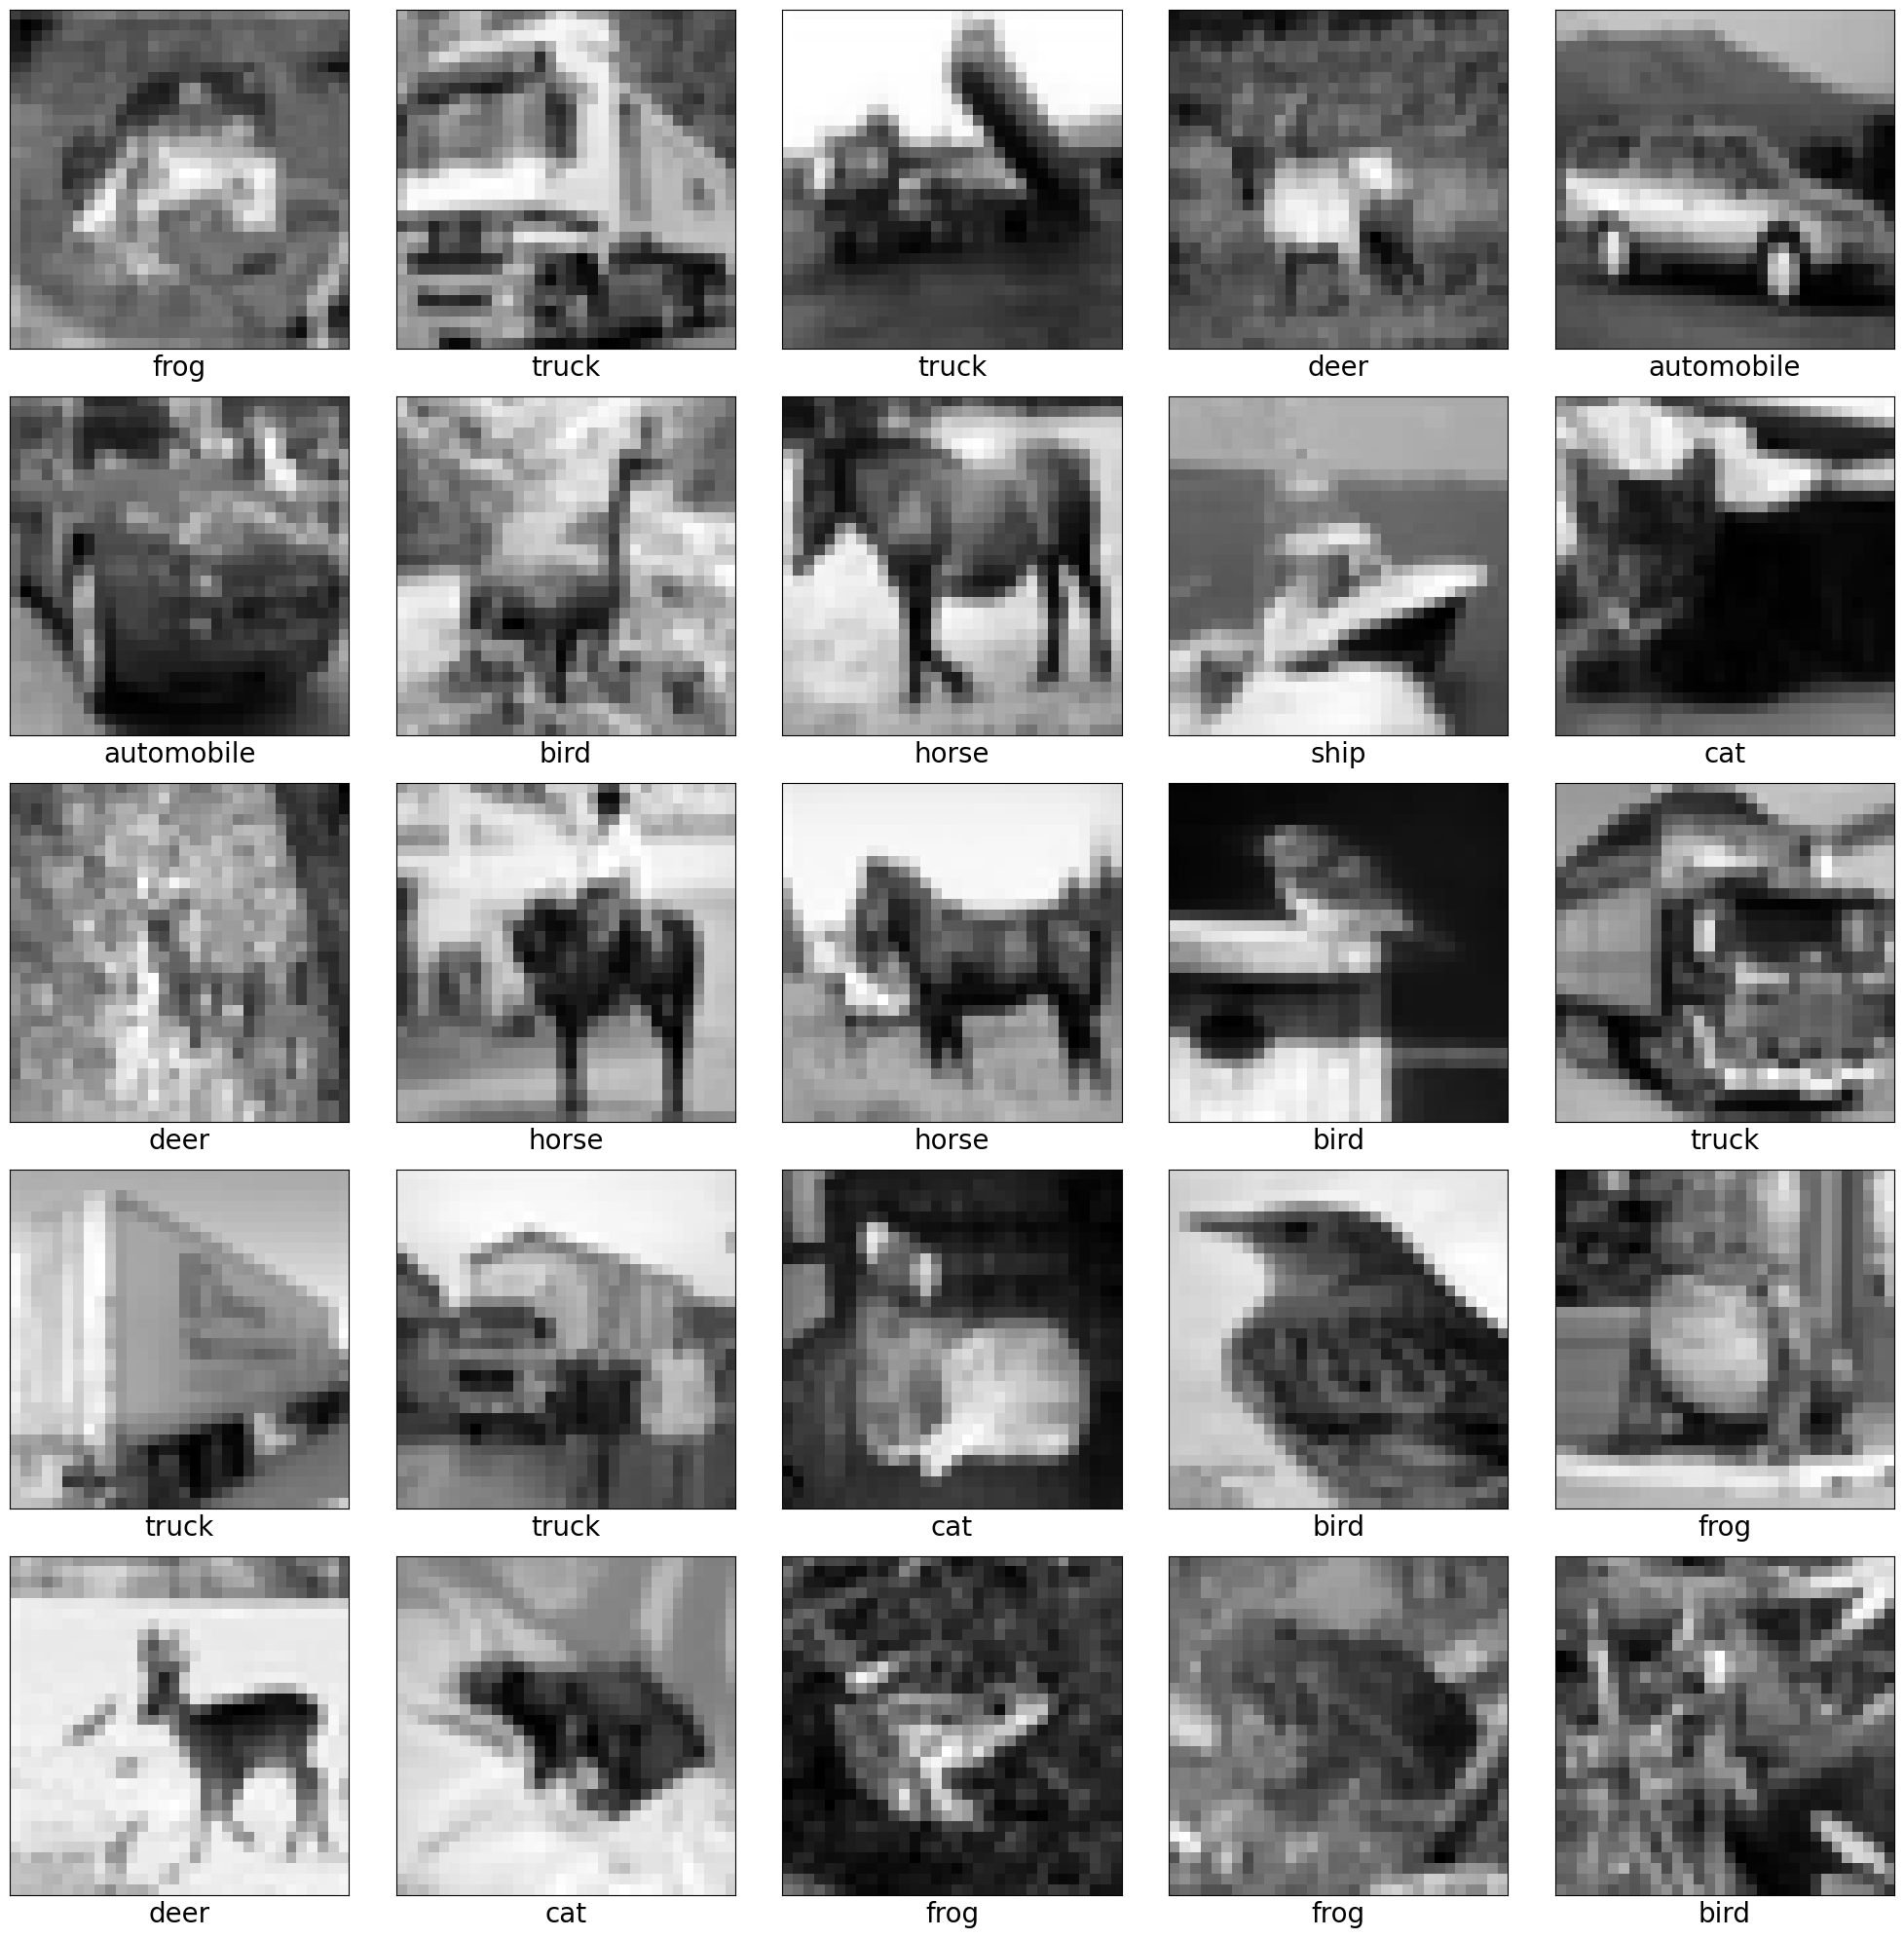

In [32]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(True)
    plt.imshow(X_train_images_gray[i], cmap = "gray")
    # The CIFAR labels happen to be arrays, 
    # which is why we would need the extra index
    plt.xlabel(class_names[y_train_labels[i][0]], fontsize = 20)

plt.tight_layout()
plt.show()

In [33]:
# Now!, We can proceed with the creation of the CNN model on grey scale images

model = Sequential(
    [
        Conv2D(input_shape = (32, 32, 1), filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        Flatten(),
        Dense(units = 64, activation = "relu"),
        Dense(10, activation = "softmax")
    ]
)

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [36]:
# compile a and train the model.

model.compile(optimizer = "adam", loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# Train the model with batch size and epochs
batch_size = 64
epochs = 2
history = model.fit(X_train_images_gray, y_train_labels, batch_size = batch_size, epochs = epochs, validation_data = (X_test_images_gray, y_test_labels))

Epoch 1/2
782/782 [==============================] - 47s 59ms/step - loss: 1.7360 - accuracy: 0.3788 - val_loss: 1.5813 - val_accuracy: 0.4395
Epoch 2/2
782/782 [==============================] - 45s 58ms/step - loss: 1.3814 - accuracy: 0.5175 - val_loss: 1.3220 - val_accuracy: 0.5290


In [ ]:
# Saving the entire model (Architecture and Weights) in current working directory.

model.save("IA_1_model.h5")

c:\IA_SEM_3\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model("IA_1_model.h5")

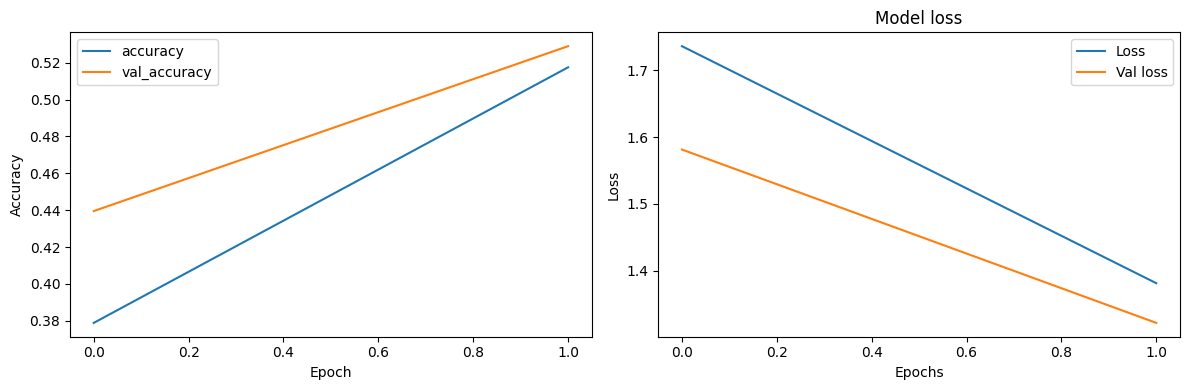

In [37]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot of model accuracy
ax1.plot(history.history["accuracy"], label="accuracy")
ax1.plot(history.history["val_accuracy"], label="val_accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="upper left")

# Plot for model loss
ax2.plot(history.history["loss"], label="Loss")
ax2.plot(history.history["val_loss"], label="Val loss")
ax2.set_title("Model loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Loss", "Val loss"], loc='upper right')

# Adjust layout for better spacing between subplots
plt.tight_layout()

plt.show()


In [38]:
test_loss, test_acc = model.evaluate(X_test_images_gray, y_test_labels, verbose = 2)
print(f"Model loss :- {test_loss}")
print(f"Model Accuracy :- {test_acc}")

313/313 - 3s - loss: 1.3220 - accuracy: 0.5290 - 3s/epoch - 10ms/step
Model loss :- 1.3220170736312866
Model Accuracy :- 0.5289999842643738


In [39]:
print(f"{round(test_acc * 100, 3) } %")

52.9 %


In [40]:
# Model prediction and classification report
X_test_predictions = model.predict(X_test_images_gray)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

# Generating the classification report
print("Classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels, zero_division=0))

313/313 [==============================] - 3s 9ms/step
Classification report
              precision    recall  f1-score   support

           0       0.55      0.40      0.47      1000
           1       0.68      0.61      0.64      1000
           2       0.44      0.30      0.35      1000
           3       0.41      0.24      0.31      1000
           4       0.42      0.60      0.49      1000
           5       0.55      0.42      0.48      1000
           6       0.56      0.72      0.63      1000
           7       0.73      0.52      0.61      1000
           8       0.44      0.88      0.59      1000
           9       0.64      0.59      0.61      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.52     10000
weighted avg       0.54      0.53      0.52     10000



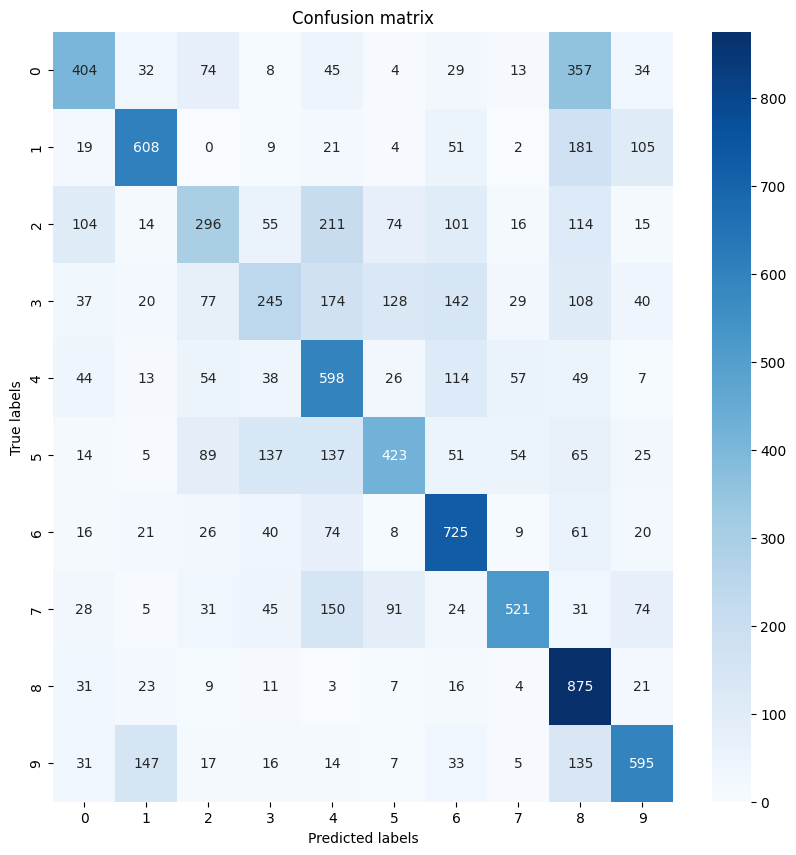

In [41]:
# Generate the Confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix in the form of heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
xtickslabels = range(0, 10, 1)
ytickslabels = range(0, 10, 1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()

313/313 [==============================] - 3s 9ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_3500\3066298468.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


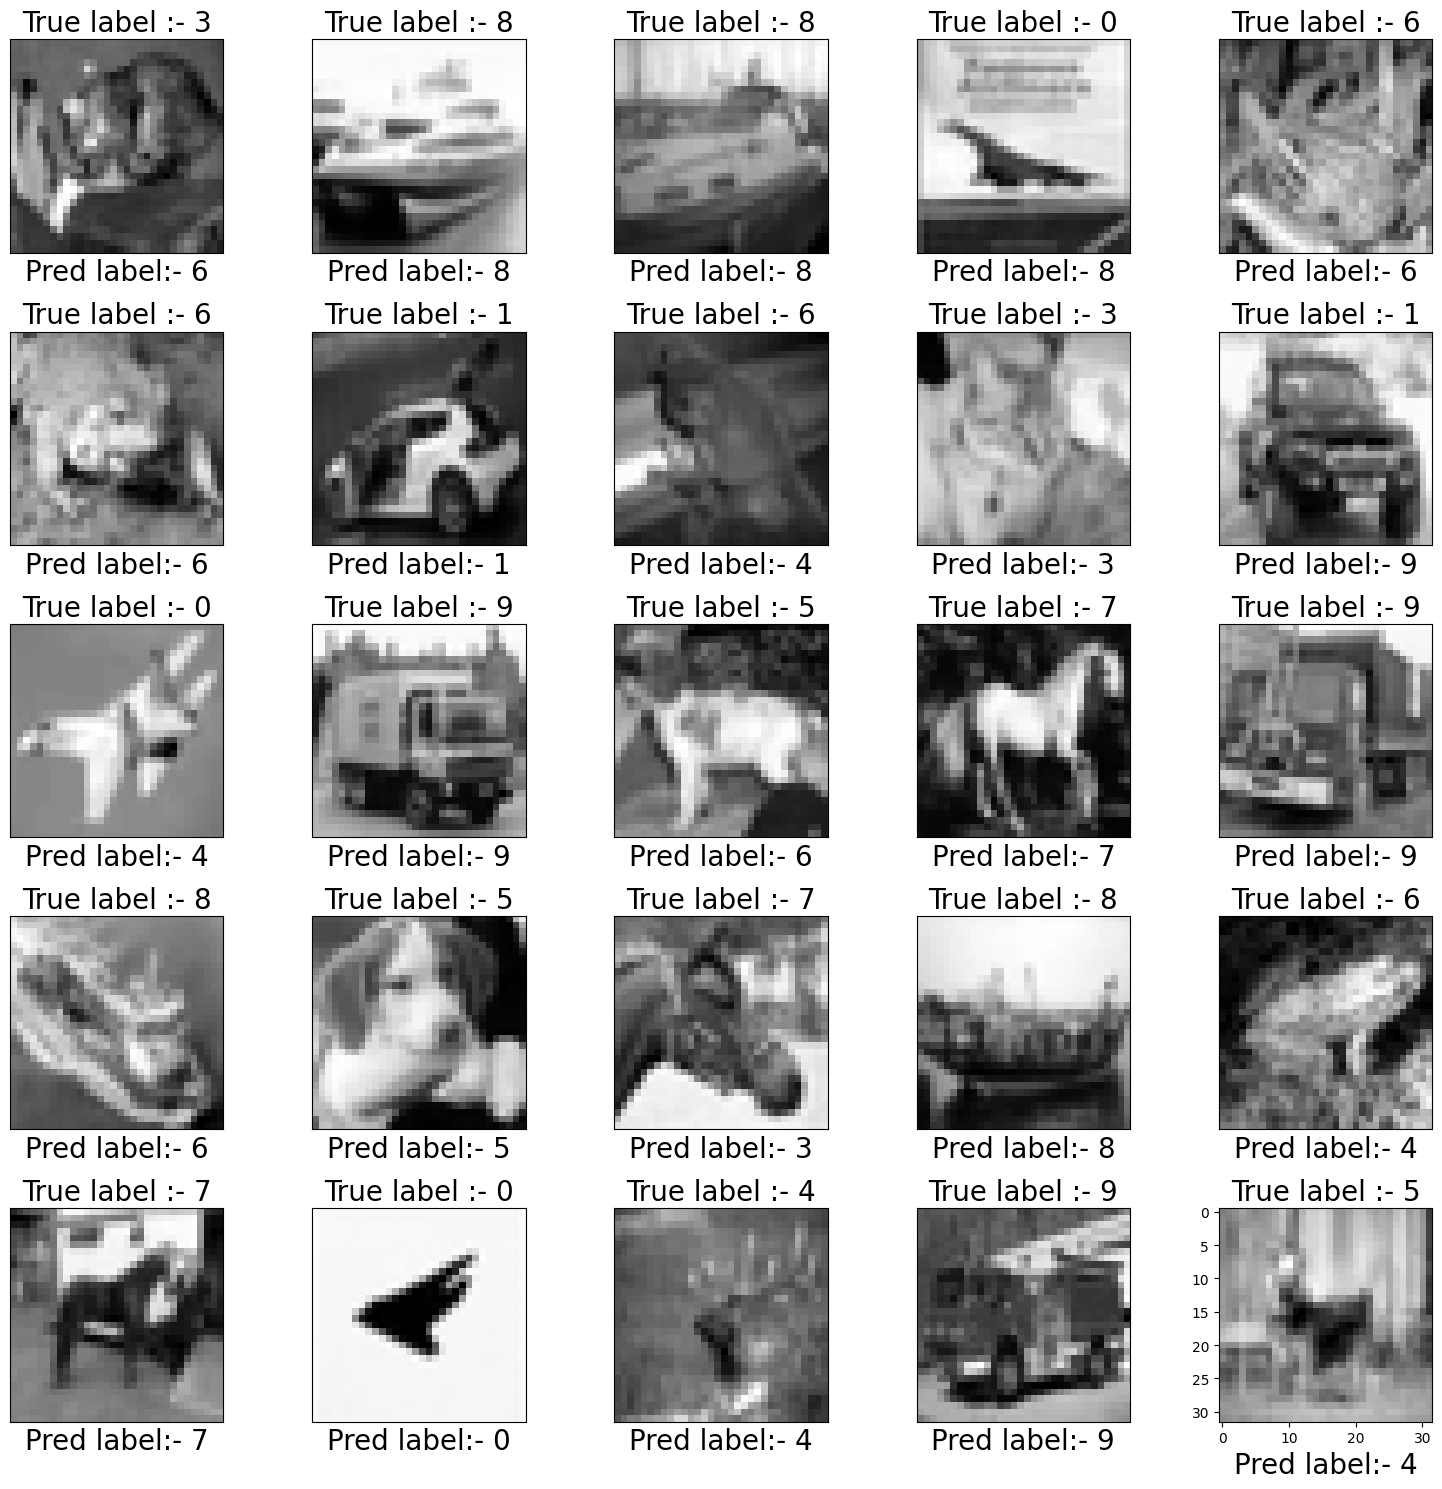

In [42]:
# Visualization of predicted data

# Model prediction
X_test_predictions = model.predict(X_test_images_gray)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

plt.figure(figsize = (15, 15))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_images_gray[i], cmap = "gray")
    plt.title(f"True label :- {y_test_true_labels[i]}", fontsize = 20)
    plt.xlabel(f"Pred label:- {y_test_pred_labels[i]}", fontsize = 20)

plt.tight_layout()
plt.show()

In [ ]:
# MobileNetV2: MobileNet models are designed to be lightweight and efficient, 
# making them a good option when resources are limited. 
# MobileNetV2 is a refined version that performs well on a 
# variety of tasks.

# VGG16 or VGG19: VGG models have a straightforward architecture with repeated layers, 
# making them easy to fine-tune.

In [46]:
# import tensorflow as tf
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.applications import VGG19
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.utils import to_categorical

# # Load and preprocess the CIFAR-10 dataset
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
# X_train = X_train / 255.0
# X_test = X_test / 255.0
# y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)

# # Create VGG19 model with pre-trained weights (excluding top layers)
# base_model = VGG19(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# for layers in base_model.layers:
#     layers.trainable = False

# # Add your own classification layers on top
# model = Sequential()
# model.add(base_model)
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Train the model
# history = model.fit(X_train, y_train, batch_size=64, epochs=2, validation_split=0.1)

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print("Test accuracy:", test_accuracy)


In [49]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Load MobileNetV2 pre-trained on ImageNet (exclude top classification layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Making all the layers.trainable = False so model doesn't relearn the weights.
for layers in base_model.layers:
    layers.trainable = False

# Add custom classification layers on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1, 1, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_6 (Dense)             (None, 128)               163968    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2423242 (9.24 MB)
Trainable params: 165258 (645.54 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [51]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=2, validation_split=0.1)

Epoch 1/2
704/704 [==============================] - 44s 57ms/step - loss: 1.9604 - accuracy: 0.2933 - val_loss: 1.8589 - val_accuracy: 0.3298
Epoch 2/2
704/704 [==============================] - 38s 54ms/step - loss: 1.8535 - accuracy: 0.3277 - val_loss: 1.8281 - val_accuracy: 0.3422


In [52]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Model loss :- {test_loss}")
print(f"Model Accuracy :- {test_acc}")

313/313 [==============================] - 9s 27ms/step - loss: 1.8532 - accuracy: 0.3294
Model loss :- 1.853247880935669
Model Accuracy :- 0.5289999842643738


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.utils import to_categorical

# # Load and preprocess the CIFAR-10 dataset
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
# X_train = X_train / 255.0
# X_test = X_test / 255.0
# y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)

# # Downsample images to a smaller size
# downsampled_size = (96, 96)
# X_train_downsampled = tf.image.resize(X_train, downsampled_size)
# X_test_downsampled = tf.image.resize(X_test, downsampled_size)

# # Resize downsampled images to (224, 224)
# target_size = (224, 224)
# X_train_resized = tf.image.resize(X_train_downsampled, target_size)
# X_test_resized = tf.image.resize(X_test_downsampled, target_size)

# # Preprocess images according to MobileNetV2 requirements
# X_train_resized = preprocess_input(X_train_resized)
# X_test_resized = preprocess_input(X_test_resized)

# # Load MobileNetV2 pre-trained on ImageNet (exclude top classification layers)
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Making all the layers.trainable = False so model doesn't relearn the weights.
# for layer in base_model.layers:
#     layer.trainable = False

# # Add custom classification layers on top
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer="adam",
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Print model summary
# model.summary()


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.utils import to_categorical

# # Load and preprocess the CIFAR-10 dataset
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
# X_train = X_train / 255.0
# X_test = X_test / 255.0
# y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)

# # Load ResNet-50 pre-trained on ImageNet (exclude top classification layers)
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# # Freeze the layers of the base model
# for layer in base_model.layers:
#     layer.trainable = False

# # Add custom classification layers on top
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Train the model
# history = model.fit(X_train, y_train, batch_size=64, epochs=2, validation_split=0.1)

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print("Test accuracy:", test_accuracy)


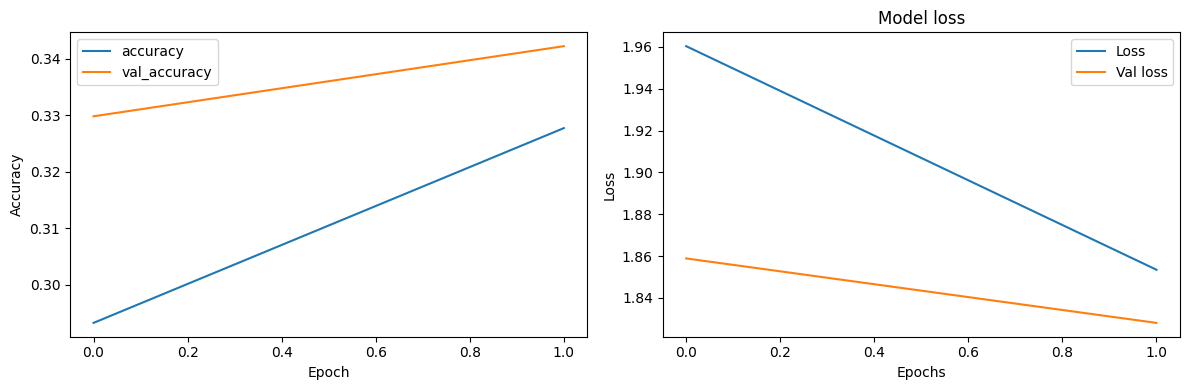

In [53]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot of model accuracy
ax1.plot(history.history["accuracy"], label="accuracy")
ax1.plot(history.history["val_accuracy"], label="val_accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="upper left")

# Plot for model loss
ax2.plot(history.history["loss"], label="Loss")
ax2.plot(history.history["val_loss"], label="Val loss")
ax2.set_title("Model loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Loss", "Val loss"], loc='upper right')

# Adjust layout for better spacing between subplots
plt.tight_layout()

plt.show()


In [54]:


# Model prediction and classification report
X_test_predictions = model.predict(X_test)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test, axis = 1)

# Generating the classification report
print("Classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels, zero_division=0))

313/313 [==============================] - 10s 26ms/step
Classification report
              precision    recall  f1-score   support

           0       0.34      0.40      0.37      1000
           1       0.27      0.42      0.33      1000
           2       0.34      0.11      0.17      1000
           3       0.32      0.24      0.27      1000
           4       0.37      0.44      0.40      1000
           5       0.29      0.18      0.22      1000
           6       0.39      0.39      0.39      1000
           7       0.31      0.40      0.35      1000
           8       0.34      0.30      0.32      1000
           9       0.35      0.42      0.38      1000

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.32     10000
weighted avg       0.33      0.33      0.32     10000



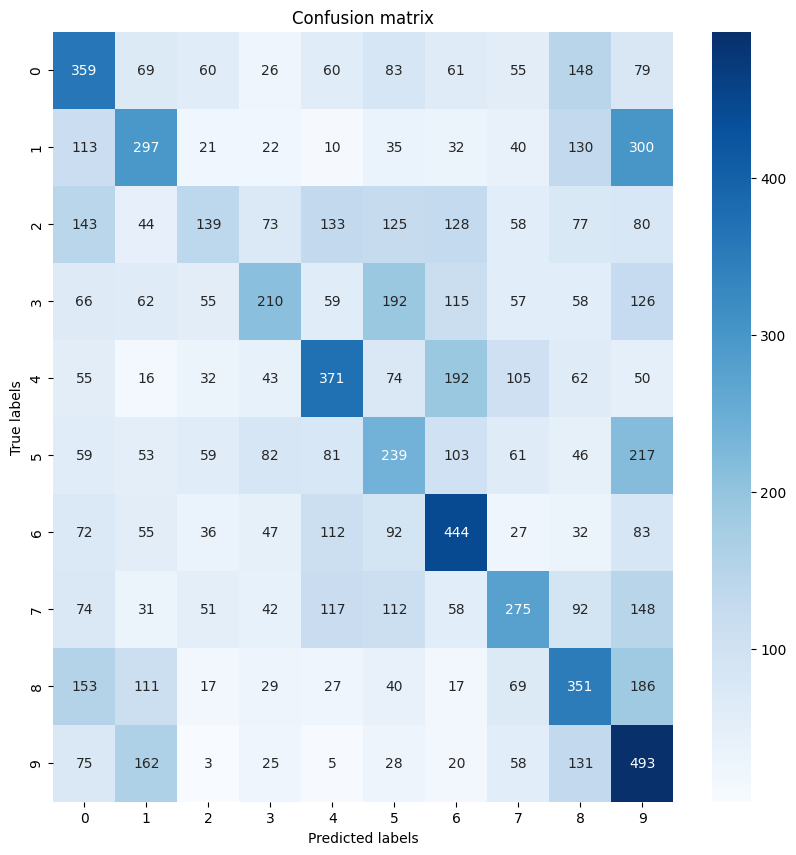

In [9]:
# Generate the Confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix in the form of heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
xtickslabels = range(0, 10, 1)
ytickslabels = range(0, 10, 1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()